In [1]:
import numpy as np
import pandas as pd

import tensorflow as tf
import tensorflow.data as tfd
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
from tensorflow.keras.callbacks import TensorBoard

from bokeh.plotting import figure
from bokeh.io import show, output_notebook

In [2]:
output_notebook()

Loading BokehJS ...

# Build Dataset

In [3]:
train_auto = pd.read_csv("./train-auto-mpg.csv")
val_auto = pd.read_csv("./val-auto-mpg.csv")
test_auto = pd.read_csv("./test-auto-mpg.csv")

In [4]:
train_auto.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,USA,Europe,Japan
count,314.000000,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,3.140000e+02,314.000000,314.000000,314.000000,314.000000,314.000000
mean,23.296497,1.301153e-16,-1.216295e-16,-3.960031e-17,2.828594e-18,5.911761e-16,75.859873,1.566879,0.627389,0.178344,0.194268
std,7.799190,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.740733,0.797551,0.484272,0.383413,0.396267
min,9.000000,-1.448081e+00,-1.205883e+00,-1.556446e+00,-1.672083e+00,-2.681627e+00,70.000000,1.000000,0.000000,0.000000,0.000000
25%,17.125000,-8.636370e-01,-8.493320e-01,-7.066299e-01,-8.891273e-01,-6.026900e-01,73.000000,1.000000,0.000000,0.000000,0.000000
50%,22.000000,-8.636370e-01,-4.253258e-01,-2.551648e-01,-1.830932e-01,-5.006121e-02,76.000000,1.000000,1.000000,0.000000,0.000000
75%,28.000000,1.474139e+00,9.454669e-01,5.415381e-01,7.762951e-01,5.727427e-01,79.000000,2.000000,1.000000,0.000000,0.000000
max,46.600000,1.474139e+00,2.504171e+00,3.197215e+00,2.408446e+00,3.213080e+00,82.000000,3.000000,1.000000,1.000000,1.000000


In [5]:
train_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,USA,Europe,Japan
0,12.0,1.474139,1.810343,2.002160,2.408446,-1.453563,71,1,1.0,0.0,0.0
1,32.9,-0.863637,-0.733694,-0.122381,-0.448657,-0.295674,81,3,0.0,0.0,1.0
2,37.0,-0.863637,-1.003516,-0.972198,-1.169038,0.897302,82,3,0.0,0.0,1.0
3,40.8,-0.863637,-1.061335,-1.051868,-1.065254,1.248178,80,3,0.0,0.0,1.0
4,20.0,0.305251,0.027590,-0.255165,0.145962,0.300814,74,1,1.0,0.0,0.0


## Slice Input and Output

In [6]:
input_cols = ["cylinders", "displacement", "horsepower", "weight", "acceleration", "model year", "USA", "Europe", "Japan"]
output_cols = ["mpg"]

xtrain_df = train_auto[input_cols]
ytrain_df = train_auto[output_cols]

xval_df = val_auto[input_cols]
yval_df = val_auto[output_cols]

xtest_df = test_auto[input_cols]
ytest_df = test_auto[output_cols]

In [7]:
xtrain_df.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,USA,Europe,Japan
0,1.474139,1.810343,2.002160,2.408446,-1.453563,71,1.0,0.0,0.0
1,-0.863637,-0.733694,-0.122381,-0.448657,-0.295674,81,0.0,0.0,1.0
2,-0.863637,-1.003516,-0.972198,-1.169038,0.897302,82,0.0,0.0,1.0
3,-0.863637,-1.061335,-1.051868,-1.065254,1.248178,80,0.0,0.0,1.0
4,0.305251,0.027590,-0.255165,0.145962,0.300814,74,1.0,0.0,0.0


In [8]:
ytrain_df.head()

,mpg
0,12.0
1,32.9
2,37.0
3,40.8
4,20.0


In [9]:
xtrain_ds = tfd.Dataset.from_tensor_slices(xtrain_df.to_numpy())
ytrain_ds = tfd.Dataset.from_tensor_slices(ytrain_df.to_numpy())
train_ds = tfd.Dataset.zip((xtrain_ds, ytrain_ds))
for x, y in train_ds.take(3):
    print(x, y)

tf.Tensor(
[ 1.47413903  1.81034316  2.00216024  2.40844569 -1.4535629  71.
  1.          0.          0.        ], shape=(9,), dtype=float64) tf.Tensor([12.], shape=(1,), dtype=float64)
tf.Tensor(
[-0.86363701 -0.73369398 -0.12238102 -0.44865724 -0.295674   81.
  0.          0.          1.        ], shape=(9,), dtype=float64) tf.Tensor([32.9], shape=(1,), dtype=float64)
tf.Tensor(
[-0.86363701 -1.0035161  -0.97219753 -1.16903789  0.89730243 82.
  0.          0.          1.        ], shape=(9,), dtype=float64) tf.Tensor([37.], shape=(1,), dtype=float64)


In [10]:
xval_ds = tfd.Dataset.from_tensor_slices(xval_df.to_numpy())
yval_ds = tfd.Dataset.from_tensor_slices(yval_df.to_numpy())
val_ds = tfd.Dataset.zip((xval_ds, yval_ds))

xtest_ds = tfd.Dataset.from_tensor_slices(xtest_df.to_numpy())
ytest_ds = tfd.Dataset.from_tensor_slices(ytest_df.to_numpy())
test_ds = tfd.Dataset.zip((xtest_ds, ytest_ds))

# Build the Model

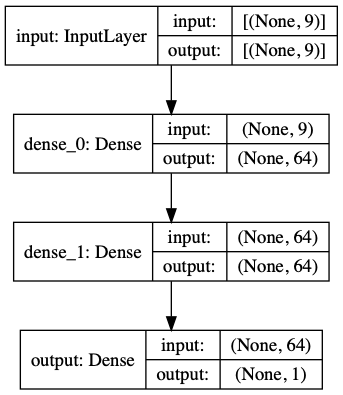

In [11]:
l1 = layers.Input(shape=(9,), name="input")
l2 = layers.Dense(64, activation="relu", name="dense_0")(l1)
l3 = layers.Dense(64, activation="relu", name="dense_1")(l2)
l4 = layers.Dense(1, name="output")(l3)

model = keras.Model(l1, l4)
keras.utils.plot_model(model, show_shapes=True)

In [12]:
tmp_batch = None
for batch_x, batch_y in train_ds.batch(8).take(1):
    tmp_batch = batch_x
    
model(tmp_batch).shape

TensorShape([8, 1])

# Train the Model

In [13]:
SHUFFLE_BUFFER = 314
BATCH_SIZE = 32
LR = 0.001

In [14]:
optim = keras.optimizers.RMSprop(LR)
model.compile(
    loss="mse",
    optimizer=optim,
    metrics=["mae", "mse"]
)

In [16]:
history = model.fit(
    train_ds.shuffle(SHUFFLE_BUFFER).batch(BATCH_SIZE),
    validation_data=val_ds.batch(BATCH_SIZE),
    epochs=1000,
    verbose=0,
    callbacks=[TensorBoard(log_dir="./train2.tb", histogram_freq=1, update_freq="epoch")]
)

In [17]:
history_df = pd.DataFrame(history.history)
history_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse
995,5.968809,1.815093,5.968810,7.804380,2.455460,9.658206
996,5.316385,1.653058,5.316384,8.592661,2.579554,10.822830
997,5.948292,1.788336,5.948292,7.809132,2.469000,9.707675
998,5.385758,1.669586,5.385758,8.389919,2.567677,10.556737
999,5.746975,1.741303,5.746975,8.206801,2.535352,10.248406


# Evaluate the Model

In [ ]:
loss, mae, mse = model.evaluate(test_ds.batch(BATCH_SIZE), verbose=0)
print(f"Mean absolute error: {mae:.3f} MPG")

In [ ]:
preds = model.predict(test_ds.batch(10000))
preds.shape

In [ ]:
type(preds)

In [ ]:
preds = list(preds.squeeze())

In [ ]:
preds[0]

In [ ]:
targets = []
for _, y in test_ds:
    targets.append(y.numpy()[0])
len(targets)

In [ ]:
targets[0]

In [ ]:
p = figure(plot_height=250, plot_width=250)
p.circle(x=preds, y=targets)
show(p)